In [1]:
""" Party Problem Stochastic Dominance Analysis """
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Run all the code here.
def plot_risk_profiles(A, B, plot_range, CDF=True, EPF=True):
    """ Plot CDFs and EPF of deals A and B """  
    if not (CDF or EPF):
        return  # Nothing to plot.
    
    xL, xH, step = plot_range
    A = sort_x_values(A)
    B = sort_x_values(B)
    AF = np.cumsum(A['p'])
    BF = np.cumsum(B['p'])
    
    X1 = [xL]
    for a in A['x']:
        X1.append(a)
        X1.append(a)
    X1.append(xH)
    F1 = [0, 0]
    for f in AF:
        F1.append(f)
        F1.append(f)
    
    X2 = [xL]
    for b in B['x']:
        X2.append(b)
        X2.append(b)
    X2.append(xH)
    
    F2 = [0, 0]
    for f in BF:
        F2.append(f)
        F2.append(f)
    
    if CDF:
        fig1, ax1 = plt.subplots(dpi=100)
        ax1.plot(X1, F1, c='r', lw=2, label=A['name'])
        ax1.plot(X2, F2, c='b', lw=2, label=B['name'])
        ax1.set_ylim(0, 1)
        ax1.set_yticks(np.linspace(0, 1, 11))
        ax1.set_ylabel("Cumulative Probability")
        ax1.set_title("Cumulative Distributions")
        ax1.set_xlim(xL, xH)
        ax1.set_xticks(np.arange(xL, xH+step/2, step))
        ax1.grid()
        ax1.legend()
        plt.show()

    if EPF:
        fig2, ax2 = plt.subplots(dpi=100)
        ax2.plot(X1, [1-f for f in F1], c='r', lw=2, label=A['name'])
        ax2.plot(X2, [1-f for f in F2], c='b', lw=2, label=B['name'])
        ax2.set_ylim(0, 1)
        ax2.set_yticks(np.linspace(0, 1, 11))
        ax2.set_ylabel("Excess Probability")
        ax2.set_title("Excess Probability Distributions")
        ax2.set_xlim(xL, xH)
        ax2.set_xticks(np.arange(xL, xH+step/2, step))
        ax2.grid()
        ax2.legend()
        plt.show()


def check_1SD(A, B, check_range, num=1000):
    """ Function to determine if A 1SD B """
    
    def cdf(x, F, t):
        """ Compute the CDF of t """
        for v, f in zip(x[::-1], F[::-1]):
            if t >= v:
                return f
        return 0
   
    xL, xH = check_range
    A = sort_x_values(A)
    B = sort_x_values(B)
    AF = np.cumsum(A['p'])
    BF = np.cumsum(B['p'])
    V = np.linspace(xL, xH, num)
    A_minus_B = [cdf(B['x'],BF,t) - cdf(A['x'],AF,t) for t in V]
    return all(np.array(A_minus_B) >= 0)


def check_2SD(A, B, plot_range, num=1000, plot=True):
    """ Check if deal A 2SD deal B and plot the difference in 
        cumulative area under ther EPFs using num samples"""
  
    A = sort_x_values(A)
    B = sort_x_values(B)
    AF = np.cumsum(A['p'])
    BF = np.cumsum(B['p'])
    
    xL, xH, step = plot_range
    
    V = np.linspace(xL, xH, num)
    # Compute a list of differences in cumulative area under the 2 CDFs 
    A_minus_B = [AuCDF(B['x'], BF, t) - AuCDF(A['x'], AF, t) for t in V]

    if plot:
        fig3, ax3 = plt.subplots(dpi=100)
        ax3.plot(V, A_minus_B, 'g-', lw=2)
        ax3.set_title("Delta cumulative area under Excess Distributions")
        ax3.set_ylabel(f"Delta({A['name']} - {B['name']})")
        ax3.set_xlim(xL, xH)
        ax3.grid()
        plt.show()

    return all(np.array(A_minus_B) >= 0)
    
def AuCDF(X, F, t):
    """ Compute area under CDF up to x-value t """
    if t <= X[0]:
        return 0
    A = 0
    x0 = X[0]
    f0 = F[0]
    for x, f in zip(X[1:], F[1:]):
        # We are done in this segment
        if t <= x:
            A += (t-x0)*f0
            return A
        # Add area of current segment and go to next
        A += (x-x0)*f0
        x0 = x
        f0 = f
    # you are here because t > X[-1]
    A += (t-x0)*f0 
    return A


def sort_x_values(A):
    # Sort the x-values of the deal in increasing order
    D = A.copy()
    order = np.argsort(D['x'])
    D['x'] = A['x'][order]
    D['p'] = A['p'][order]
    return D



Checking Indoors vs Porch



Indoors does not 1SD Porch


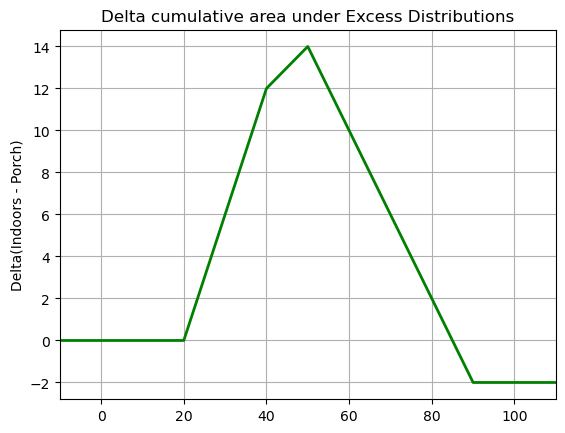


Indoors does not 2SD Porch

Checking Indoors vs Outdoors



Indoors does not 1SD Outdoors


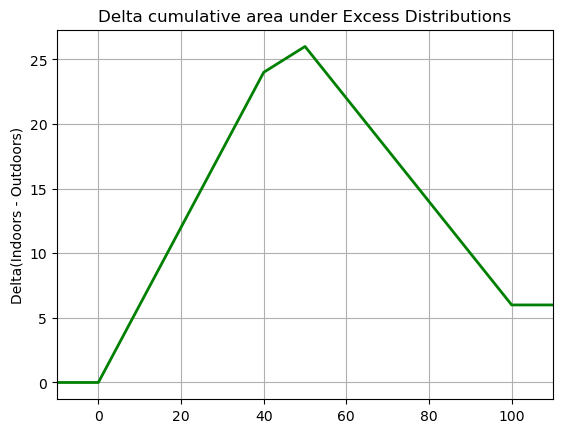


Indoors 2SD Outdoors

Checking Porch vs Outdoors



Porch does not 1SD Outdoors


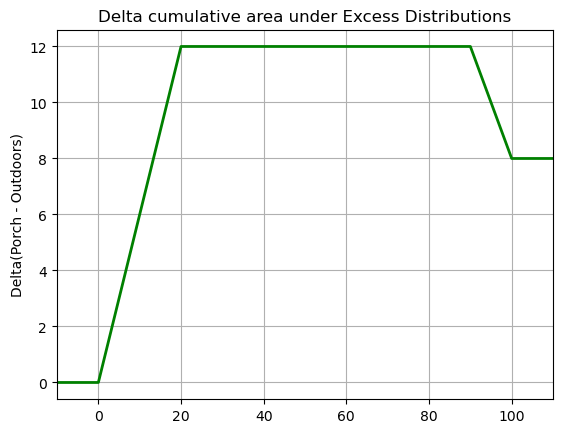


Porch 2SD Outdoors


In [3]:
# Stochastic Dominance Analysis for the Party Problem.
# Define the risk profiles to check for SD.
# x value do not need to be sorted.
Outdoors = {'name': 'Outdoors',
            'x':np.array([0, 100]),
            'p':np.array([0.6, 0.4]) }

Porch = {'name': 'Porch',
         'x': np.array([20, 90]),
         'p': np.array([0.6, 0.4]) }

Indoors ={'name': 'Indoors',
          'x': np.array([40, 50]),
          'p': np.array([0.4, 0.6]) }

# Plot with grid from -10 to 110 (included) step 10
plot_range = (-10, 110, 10)  
num = 121  
# Number of sample points to check for 1SD and 2SD
# Check for 1SD and 2SD for pairs of deals in the list
for A, B in [(Indoors, Porch),(Indoors, Outdoors),(Porch, Outdoors)]:
    print(f"\nChecking {A['name']} vs {B['name']}")

    # Choose the plots you want.
    plot_risk_profiles(A, B, plot_range, CDF=False, EPF=True)

    if check_1SD(A, B, plot_range[:-1], num):
        print(f"\n{A['name']} 1SD {B['name']}")
    else:
        print(f"\n{A['name']} does not 1SD {B['name']}")

    if check_2SD(A, B, plot_range, num, plot=True):
        print(f"\n{A['name']} 2SD {B['name']}")
    else:
        print(f"\n{A['name']} does not 2SD {B['name']}")